## Hybrid Crytograph Project – Group 3

Names and students numbers: Bo Cresser (2547206), ________________________

In this project, we will design a hybrid cryptography system using the RSA protocol for key exchange and the Vigenère cipher for bulk data transfer. We will then improve the security of your system by adding an extra layer of random encoding. Lastly, we will complete one of the extensions, from either section 5 (breaking the Vigenère cipher), section 6 (cracking the RSA protocol), or section 7 (implementing RSA+AES and DH+AES).

### Setup: Collaborating coding infrastructure

We spent most of the first two weeks of the project working out how to code collaboratively. Charles disuaded us from trying to use Notable or emailing each other sections of code like some Frankensein's monster.

So, we attempted to use GitHub.

Matt, who is most experience with coding, having done Computer Science A Level, set up a GitHub repository for us. We then tried to set up Visual Studio Code, which we new could be integrated with GitHub to make it easier to pull and push changes.

However, this created it's own issues, as the whole team had to install and get used to VSCode, which is powerful but confusing to start with. Sam, one of the helpers in one of the tutorials was very helpful.

But, the technical difficulties kept coming.

From installing Python natively to cloning directly onto our computers, we overcame waves upon waves of novel challenges. In the end, we decided not to use branches as this added another layer of complication. Some members of the team also dragged and dropped their changes manually to and from GitHub as they could not get this feature within VSCode to work.

While there may have been a more effective method for our level of expertise (or lack of), once we worked out how to use GitHub, it did have the benefit of backing up everything we committ so that we could go back if anything was accidentally overwritten or deleted. It was also a very good was to learn how to use GitHub, in case any of us do more formal collaborative coding in future.

Now, onto the project...

### Setup: Global variables and reusable functions
Early on in the project we realised that planning ahead and making functions reusable would be essential to a successful project as it is more efficient, can reduce time spent coding similar functions that we have already made and also it can create a more robust solution as the functions we use are well tested.

To start we defined some of the global variables and necessary libraries that we will use throughout the project.

In [65]:
#Libraries
import requests, os, random
import time
import statistics
from random import SystemRandom, randint
import matplotlib.pyplot as plt
import numpy as np
from functions import *

In [66]:
#Global variables
global alphabet_upper
alphabet_upper="ABCDEFGHIJKLMNOPQRSTUVWXYZ"
global alphabet_lower
alphabet_lower=alphabet_upper.lower()

As we are working with alphabetical messages and sometime keys in this project we decided to write a function clean_text(). The purpose of this is to only keep alphabetical characters from the inputted text. It has parameters of the text, preserve_case and verbose. preserve_case is a parameter that if False converts the message to upper case, this makes it reusable for more questions later on.

In [67]:
#input cleaning function

def clean_text(g_in_text,preserve_case=True,verbose=False):
    in_text=g_in_text#make a local copy
    out_text=""
    if verbose:
        print("Input text is: ", in_text)
    for i in range (0,len(in_text)): #run through all characters and add them if they are in the alphabet
        if in_text[i] in alphabet_lower:
            out_text+=in_text[i]
        elif in_text[i] in alphabet_upper:
            out_text+=in_text[i]
    if verbose:
        print("Text without spaces, symbols, numbers ",out_text)
    if not(preserve_case): #if we aren't preserving the case then we convert it all to upper case
        out_text=str(out_text.upper())
        if verbose:
            print("Case not preserved so convert it to uppercase ",out_text)
    return out_text

It works by iterating through each character in in_text and adding concatenating it to out_text if its in the alphabet. You can try it below.

In [68]:
message="James walked his dog Jeremery!"
print("The cleaned version of that message is: ",clean_text(message,True))

The cleaned version of that message is:  JameswalkedhisdogJeremery


#### Core section 1: Implementing functions to encrypt and decrypt messages using the Caesar cipher and the Vigenère cipher. 

First we wrote the function caesar_cipher(). This is one function to both encrypt and  decrypt messages depending on the argument passed in by the user, this  is to improve space  effiency and increase robustness. Its parameters are g_input_text where g stands for given, g_key,encrypt and verbose.

In [69]:
def caesar_cipher(g_input_text,g_key,encrypt=True,verbose=False):

    #input_text should be fed in as a string, key should be any integer although it only is unique from 0,26

    input_text=g_input_text #creating local copies of arguments
    
    output_text=""
    if encrypt:
        key_multiplier=1
    else:
        key_multiplier=-1
    key=g_key*key_multiplier # g for given

    input_text=clean_text(input_text) #clean the input

    for i in range (0,len(input_text)):
        if input_text[i] in alphabet_upper:
            position_in_alphabet=alphabet_upper.index(input_text[i])
            output_text+=alphabet_upper[(position_in_alphabet+key)%26]
        else: #if adding support for spaces later add it below and change the clean_text function to suppport this
            position_in_alphabet=alphabet_lower.index(input_text[i])
            output_text+=alphabet_lower[(position_in_alphabet+key)%26]
    return output_text

It works in a few simple steps:
1. Make copies of input text and key to make sure they are taken as copies.
2. If the user has specified to encrypt the message then our key is  multiplied by one, otherwise it is multiplied by -1 which means when the shift is applied it is in the opposite direction effectively decrypting the message.
3. We  iterate through the input message and for each character we select the appropriate case of alphabet and we add the key to its numerical position in the alphabet. We take the mod of this to make sure it lies betweeen 0 and 26 then we add the character at that position to the output.
4. We output the output_text

See examples below on how it works on different messages and with the null shift.

In [70]:
#first we see how it works for a normal key
print(message, "encrypted with key=5 is: ")
print(caesar_cipher(message,5))

#show that the decrypting works
print("\nWe can decrypt this by using the same key: ")
print(caesar_cipher(caesar_cipher(message,5), 5,False))

#Show that it works for the null shift
print("\nThe caesar cipher function also works for the null shift (key=0), this outputs the same message as inputted \nalbeit cleaned by the clean text function")
print(caesar_cipher(message,0))

#Show that it works for random key
r_key=random.randrange(0,26)
print("\nThe function also works for a random key ",r_key)
print(caesar_cipher(message,r_key))
print("Decrypting it works still")
print(caesar_cipher(caesar_cipher(message,r_key),r_key,False))

James walked his dog Jeremery! encrypted with key=5 is: 
OfrjxbfqpjimnxitlOjwjrjwd

We can decrypt this by using the same key: 
JameswalkedhisdogJeremery

The caesar cipher function also works for the null shift (key=0), this outputs the same message as inputted 
albeit cleaned by the clean text function
JameswalkedhisdogJeremery

The function also works for a random key  18
BsewkosdcwvzakvgyBwjwewjq
Decrypting it works still
JameswalkedhisdogJeremery


Next was Vigenere cipher. We named the function v_cipher() as it is clearly distinguishable from caesar_cipher() and hard to misspell. Once again this is only one function to both encrypt and decrypt. It uses caesar cipher to shift each character in the message by an amount given in the key. 

This is our first demonstration of reusable functions. It is more space efficient and more robust as if we modify the functionality of the reusable function it changes for every part of the code it is used, otherwise we would have to change many parts which can cause errors. 

The inputs are g_input_text which is given input text passed in as a string, g_key which is given key also passed in as a string of any length, encrypt which is a boolean to decide if the function is encrypting or decrypting, verbose which is a boolean used for error checking.

In [71]:
#vigenere cipher

def v_cipher(g_input_text,g_key,encrypt=True,verbose=False):
    input_text=clean_text(g_input_text)
    key=clean_text(g_key,preserve_case=False)
    output_text=""

    #for each letter in inpur text message we perform a caesar cipher on it using the ith char in key
    for i in range (0,len(input_text)):
        ith_key=alphabet_upper.index(key[i%len(key)])
        if verbose:
            print("Ith key is", ith_key)
        output_text+=caesar_cipher(input_text[i],ith_key,encrypt)
    return output_text

This function works in a few simple steps. 
1. We make copies of the input text and key and clean them both. Cleaning the key is really helpful here as it means the function can consistently decrypt texts even if someone drops a case in one letter of the key. Note we capitalise the key in the clean_text function by setting preserve_case=False.
2. We iterate through each character in the input text. For each character we cipher it using the part of the key in the corresponding place. Each character in the key is equivalent to an integer that we can encrypt with (with A being the null shift 0). If the message is longer than the key then we start from the beginning of the key again hence the modulus in the line defining ith_key.
3. Using the ith_key we encrypt each character in input_text and concatenate it onto output_text
4. We return output_text

Below are some tests to show the functionality and robustness of this function.

In [72]:
#First show basic functionality of the function
print("Encrypting our standard message with key='HANDS' we get: ")
print(v_cipher(message,"HANDS"))
print("Decrypting this with the same key gets us: ")
print(v_cipher(v_cipher(message,"HANDS"),"HANDS",False))

#Testing varied key inputs
print("\nWe can see that the key 'AAA' is the null cipher: ")
print(v_cipher(message,"AAA"))

print("We can introduce different cases and symbols to our key and see it still works")
print("Key= 'Ha2Nd s'")
print(v_cipher(message,"Ha2Nd s"))
print(v_cipher(v_cipher(message,"Ha2Nd s"),"Ha2Nd s",False))

print("\nWe can encypt with a key longer than the message, key= Harry went for a walk with his cat Harriot and stopped at the park ")
print(v_cipher(message,"Harry went for a walk with his cat Harriot and stopped at the park"))

#We can also encrypt and decrypt using a random key
r_v_key=""
for i in range(0,random.randrange(1,50)):
    r_v_key+=str(alphabet_upper[random.randrange(0,26)])
print("\nUsing a key of random letters and length: ", r_v_key, "we get, ")
print(v_cipher(message,r_v_key))
print("Using the same key to decrypt we get: ")
print(v_cipher(v_cipher(message,r_v_key),r_v_key,False))

Encrypting our standard message with key='HANDS' we get: 
QazhkdaynwkhvvvvgWhjlmruq
Decrypting this with the same key gets us: 
JameswalkedhisdogJeremery

We can see that the key 'AAA' is the null cipher: 
JameswalkedhisdogJeremery
We can introduce different cases and symbols to our key and see it still works
Key= 'Ha2Nd s'
QazhkdaynwkhvvvvgWhjlmruq
JameswalkedhisdogJeremery

We can encypt with a key longer than the message, key= Harry went for a walk with his cat Harriot and stopped at the park 
QadvqseydjryiodzqFmkltmja

Using a key of random letters and length:  QZHPCIZUCPPAHNNGDXTGWHLXPQHEKIIHLNAZRRETAK we get, 
ZzttuezfmtshpfqujGxxatpon
Using the same key to decrypt we get: 
JameswalkedhisdogJeremery


#### Core section 2: Implementing a function to systematically break the Caesar cipher using letter frequency analysis.

To write this function, we started by importing texts to approximate the frequency of letters in the English language.

In [73]:


def url_to_text_utf8(url):
    '''
    Given a url for a text that is 
    'utf-8' encoded this function 
    returns that text.
    '''
    response = requests.get(url)
    response.encoding = 'utf-8-sig'
    return response.text

austen_text = url_to_text_utf8("https://www.gutenberg.org/files/1342/1342-0.txt")

# print(austen_text[:1000])

austen_text[:1000]

def text_to_file(text_string, file_name):
    '''
    Write the string text_string, to file with 
    name file_name (and return the object None). 
    '''
    with open(file_name,'w', encoding='utf-8-sig', errors='ignore') as f:
        f.write(text_string)
    return None

text_to_file(austen_text,"text_files/jane_austen.txt")

def file_to_text(file_name):
    '''
    Read the text file with name file_name
    and return its contents as a string.
    '''
    with open(file_name,'r',encoding='utf-8-sig', errors='ignore') as f:
        text = f.read()
    return text

new_austen_text = file_to_text("text_files/jane_austen.txt")

KeyboardInterrupt: 

#### Core section 3: Writing functions that implement the Hybrid System described below:

"Hybrid System. Alice generates her private and public key. Bob generates a Vigenère key and Vigenère encrypts/enciphers his message with this key. Then, after slicing it into parts (if necessary) he encodes and RSA encrypts his Vigenère key using Alice’s public key
and finally sends both the resulting tuple of ciphertext integers and his Vigenère encrypted message to Alice. Alice uses her private key to RSA decrypt the tuple of ciphertext integers. She then converts/decodes the resulting integers to strings and so reconstructs the Vigenère key. She uses this to Vigenère decrypt/decipher Bob’s message."

To write these functions, we started by...

In [ ]:
print('This is a python block')

#### Core section 4: Redesigning our system by performing a random encoding of each letter of the alphabet in to one or more 2-grams.

There are 26 ·25 = 650 many 2-grams made up of distinct letters. The goal is to do encode the alphabet by these 2-grams in such a way that the frequency of occurrence of each letter is disguised.

To implement this encoding, we started by...

In [ ]:
print('This is a python block')

#### Extension: Section 6: Cracking the RSA protocol

We decided to tackle question 6 as this quesion links to number theory and the RSA protocal, which we had found interesting in the week 8 tutorial and 4th homework.

**Question:**

In our presentation of the RSA protocol (in the 2023 lectures on the GitHub page) we use 512-bit (i.e. 154 digits in decimal) primes p and q. The security of the protocol relies on the fact that it is VERY HARD to recover p and q—i.e. to factorise N —from N = p · q if you only know N.

To see that this is indeed the case, and also to see what happens when we allow p and q to be smaller, you should begin by testing the performance of the smallest_factor_function from lectures. To do this generate primes p, q and input N = p · q to the smallest factor function. Starting with l = 16 bit primes write an algorithm that shows the average computation time on input N = p · q for k-bit primes p, q for k = l, l + 1, l + 2, . . . . Continue this analysis for as long as the outcome is a matter of minutes—e.g. up to 15 minutes.

**Answer**

Plot your results for both smallest factor and pollard rho showing the expected out- comes (extrapolated from your results) on longer bit lengths. Hence conjecture at what bit length the use of each function becomes unfeasible.

We started by working out which functions we would need from previous lectures. As well as taking smallest_factor, we took random_prime and its auxilliaries. We then tested that all these functions were working. It was striking to see that the smallest_factor function does indeed extract a prime factor when N is made up of only 16 by 16 bit primes.

In [ ]:
# Now we test whether these function work as intended
p = random_prime(16)
q = random_prime(16)
N = p * q
smallest_factor(N)
print("p =", p)
print("q =", q)
print("N =", N)
print(smallest_factor(N))

Then...

In [ ]:
# Now we can begin the analysis as requested

def time_factorisation(l, max_time, input_function, Verbose=False):
    bit_lengths = []
    avg_times = []
    
    while True:
        times = []
        for _ in range(5):  # Run 5 trials for each bit length
            p = random_prime(l)
            q = random_prime(l)
            N = p * q
            start_time = time.time()
            input_function(N)
            end_time = time.time()
            times.append(end_time - start_time)

        avg_time = statistics.mean(times)
        # print(f"Bit length: {l}, Average time: {avg_time:.2f} seconds")
        bit_lengths.append(l)
        avg_times.append(avg_time)
        if avg_time > max_time:
            return [bit_lengths, avg_times]
            break
        l += 1

In [98]:
# Generate data on pollard rho timings
l = 16
max_time = 0.5
# max_time = 15 * 60  # 15 minutes in seconds
smallest_factor_data = time_factorisation(l, max_time, smallest_factor)
print(smallest_factor_data)

[[16, 17, 18, 19, 20, 21, 22, 23], [0.018035221099853515, 0.016060447692871092, 0.021671485900878907, 0.045760154724121094, 0.12493510246276855, 0.16418352127075195, 0.44243779182434084, 0.8799765586853028]]


**Question**

Using the function smallest factor is clearly not an efficient way of factorising large integers. A better way of doing this is via the Pollard rho method. Write a function pollard rho that implements the Pollard rho method using the outline given in the file pollard rho.pdf. Carry out the analysis that you carried out on smallest factor on your function.

**Useful example**

Example. Consider the integer N = 78667. We make use of the pseudo-random sequence defined by m0 = 3, mi+1 = m2i −1 (mod N) to obtain a factorisation of N. The sequence is (3,8,63,3968,11623,22889,62767,52928,41313,4736,9600,...) so our algorithm computes, gcd(m2 −m1,N) = gcd(63 −8,78667) = 1, and continuing, that gcd(m2s −m1s,N) = 1 for s = 2,3,4. However, gcd(m10 −m5,N) = gcd(9600 −22889,78667) = 97 and so, as 78667/97 = 811 we have found the factorisation 78667 = 97 ·811.

**Answer**

Then...

In [ ]:
# pollard's rho algorithm for factorization

def pollard_rho_v1(N, max_iterations=10000):

    def f(x):
        return (x * x - 1) % N

    m0 = 3
    m1 = f(m0)
    m2 = f(f(m0))

    for i in range(1, max_iterations):  # Limit iterations to avoid infinite loops

        d = gcd(abs(m2 - m1), N)

        # print(m1, m2, d)  # Print the sequence values and gcd for tracing

        if d > 1 and d < N:
            return d  # Found a non-trivial factor
            
        m1 = f(m1)
        m2 = f(f(m2))
        
    return None  # No factor found within the iteration limit

In [123]:
# Test whether the function works as intended
# N = 78667
p = random_prime(16)
q = random_prime(16)
N = p * q
pollard_rho(N)
print("p =", p)
print("q =", q)
print("N =", N)
print(pollard_rho_v1(N))

p = 48611
q = 62549
N = 3040569439
48611


In [124]:
# Generate data on pollard rho version 1 timings
l = 16
max_time = 0.5
# max_time = 15 * 60  # 15 minutes in seconds
pollard_rho_data_v1 = time_factorisation(l, max_time, pollard_rho_v1)
print(pollard_rho_data)

[[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], [0.00312190055847168, 0.004028940200805664, 0.003985404968261719, 0.0033215999603271483, 0.003812217712402344, 0.014314746856689453, 0.021247148513793945, 0.04735116958618164, 0.046245574951171875, 0.06007537841796875, 0.15026545524597168, 0.1664958953857422, 0.13185701370239258, 0.22268996238708497, 0.22966327667236328, 0.3139960289001465]]


**Question**

Plot your results for both smallest factor and pollard rho showing the expected out- comes (extrapolated from your results) on longer bit lengths. Hence conjecture at what bit length the use of each function becomes unfeasible.

**Answer**

I have concerns about my pollard rho algorithm being inefficient as it is not considerably faster than the smallest factor theorem. And I also haven't tested the algorith for longer periods of time. But before investigating that further, I am going to try to plot my current results for just a few bit lengths and not extrapolating yet or tweaking my alogirthms.

In [125]:
def plot_graphs(data1, data2):
    x1 = np.array(data1[0])
    y1 = np.array(data1[1])

    x2 = np.array(data2[0])
    y2 = np.array(data2[1])

    plt.plot(x, y, label='Smallest Factor Method')
    plt.plot(x2, y2, label='Pollard Rho Method')

    plt.title('Factorization Time vs Bit Length')
    plt.xlabel('Bit Length of Primes (l)')
    plt.ylabel('Average Time to Factor (seconds)')
    plt.legend()
    plt.show()

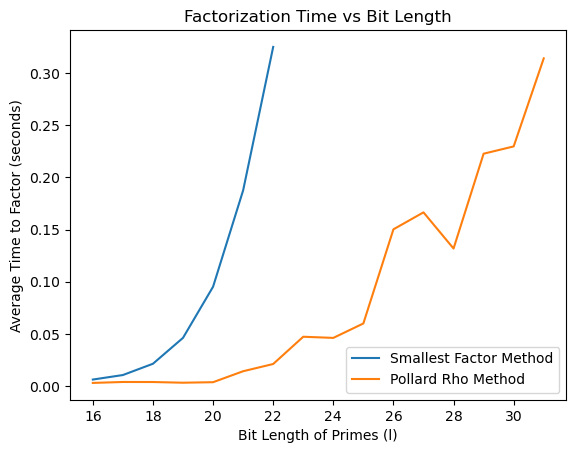

In [110]:
plot_graphs(smallest_factor_data, pollard_rho_data_v1)

In [126]:
def pollard_rho_v2(N, max_iterations=10000):

    c = random.randrange(1, N-1)  # Random constant for the polynomial
    def f(x):
        return (x * x + c) % N

    m0 = random.randrange(2, N-2)
    m1 = f(m0)
    m2 = f(f(m0))

    for i in range(1, max_iterations):  # Limit iterations to avoid infinite loops

        d = gcd(abs(m2 - m1), N)

        # print(m1, m2, d)  # Print the sequence values and gcd for tracing

        if d > 1 and d < N:
            return d  # Found a non-trivial factor

        m1 = f(m1)
        m2 = f(f(m2))
        
    return None  # No factor found within the iteration limit

In [127]:
# Test whether the function works as intended
# N = 78667
p = random_prime(16)
q = random_prime(16)
N = p * q
print("p =", p)
print("q =", q)
print("N =", N)
print(pollard_rho_v2(N))

p = 35111
q = 62131
N = 2181481541
62131


In [128]:
# Generate data on pollard rho version 1 timings
l = 16
max_time = 0.1
# max_time = 15 * 60  # 15 minutes in seconds
pollard_rho_data_v2 = time_factorisation(l, max_time, pollard_rho_v2)
print(pollard_rho_data)

[[16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31], [0.00312190055847168, 0.004028940200805664, 0.003985404968261719, 0.0033215999603271483, 0.003812217712402344, 0.014314746856689453, 0.021247148513793945, 0.04735116958618164, 0.046245574951171875, 0.06007537841796875, 0.15026545524597168, 0.1664958953857422, 0.13185701370239258, 0.22268996238708497, 0.22966327667236328, 0.3139960289001465]]


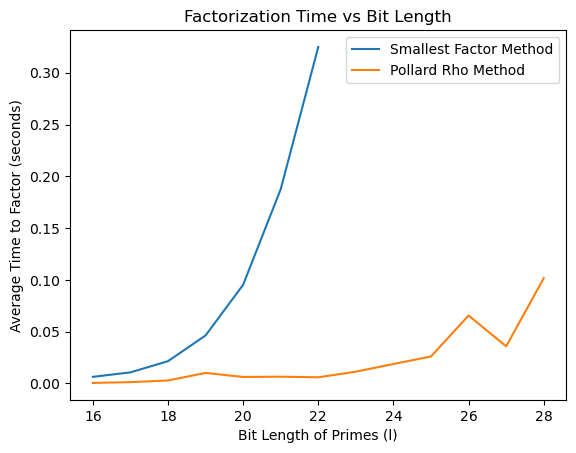

In [129]:
plot_graphs(smallest_factor_data, pollard_rho_data_v2)

#### Reflections on the project

In conclusion, through this project we found that...